# Chapter 7: Distributions #

## Code segment 7.1  
Figure 7.1 in Section 7.1

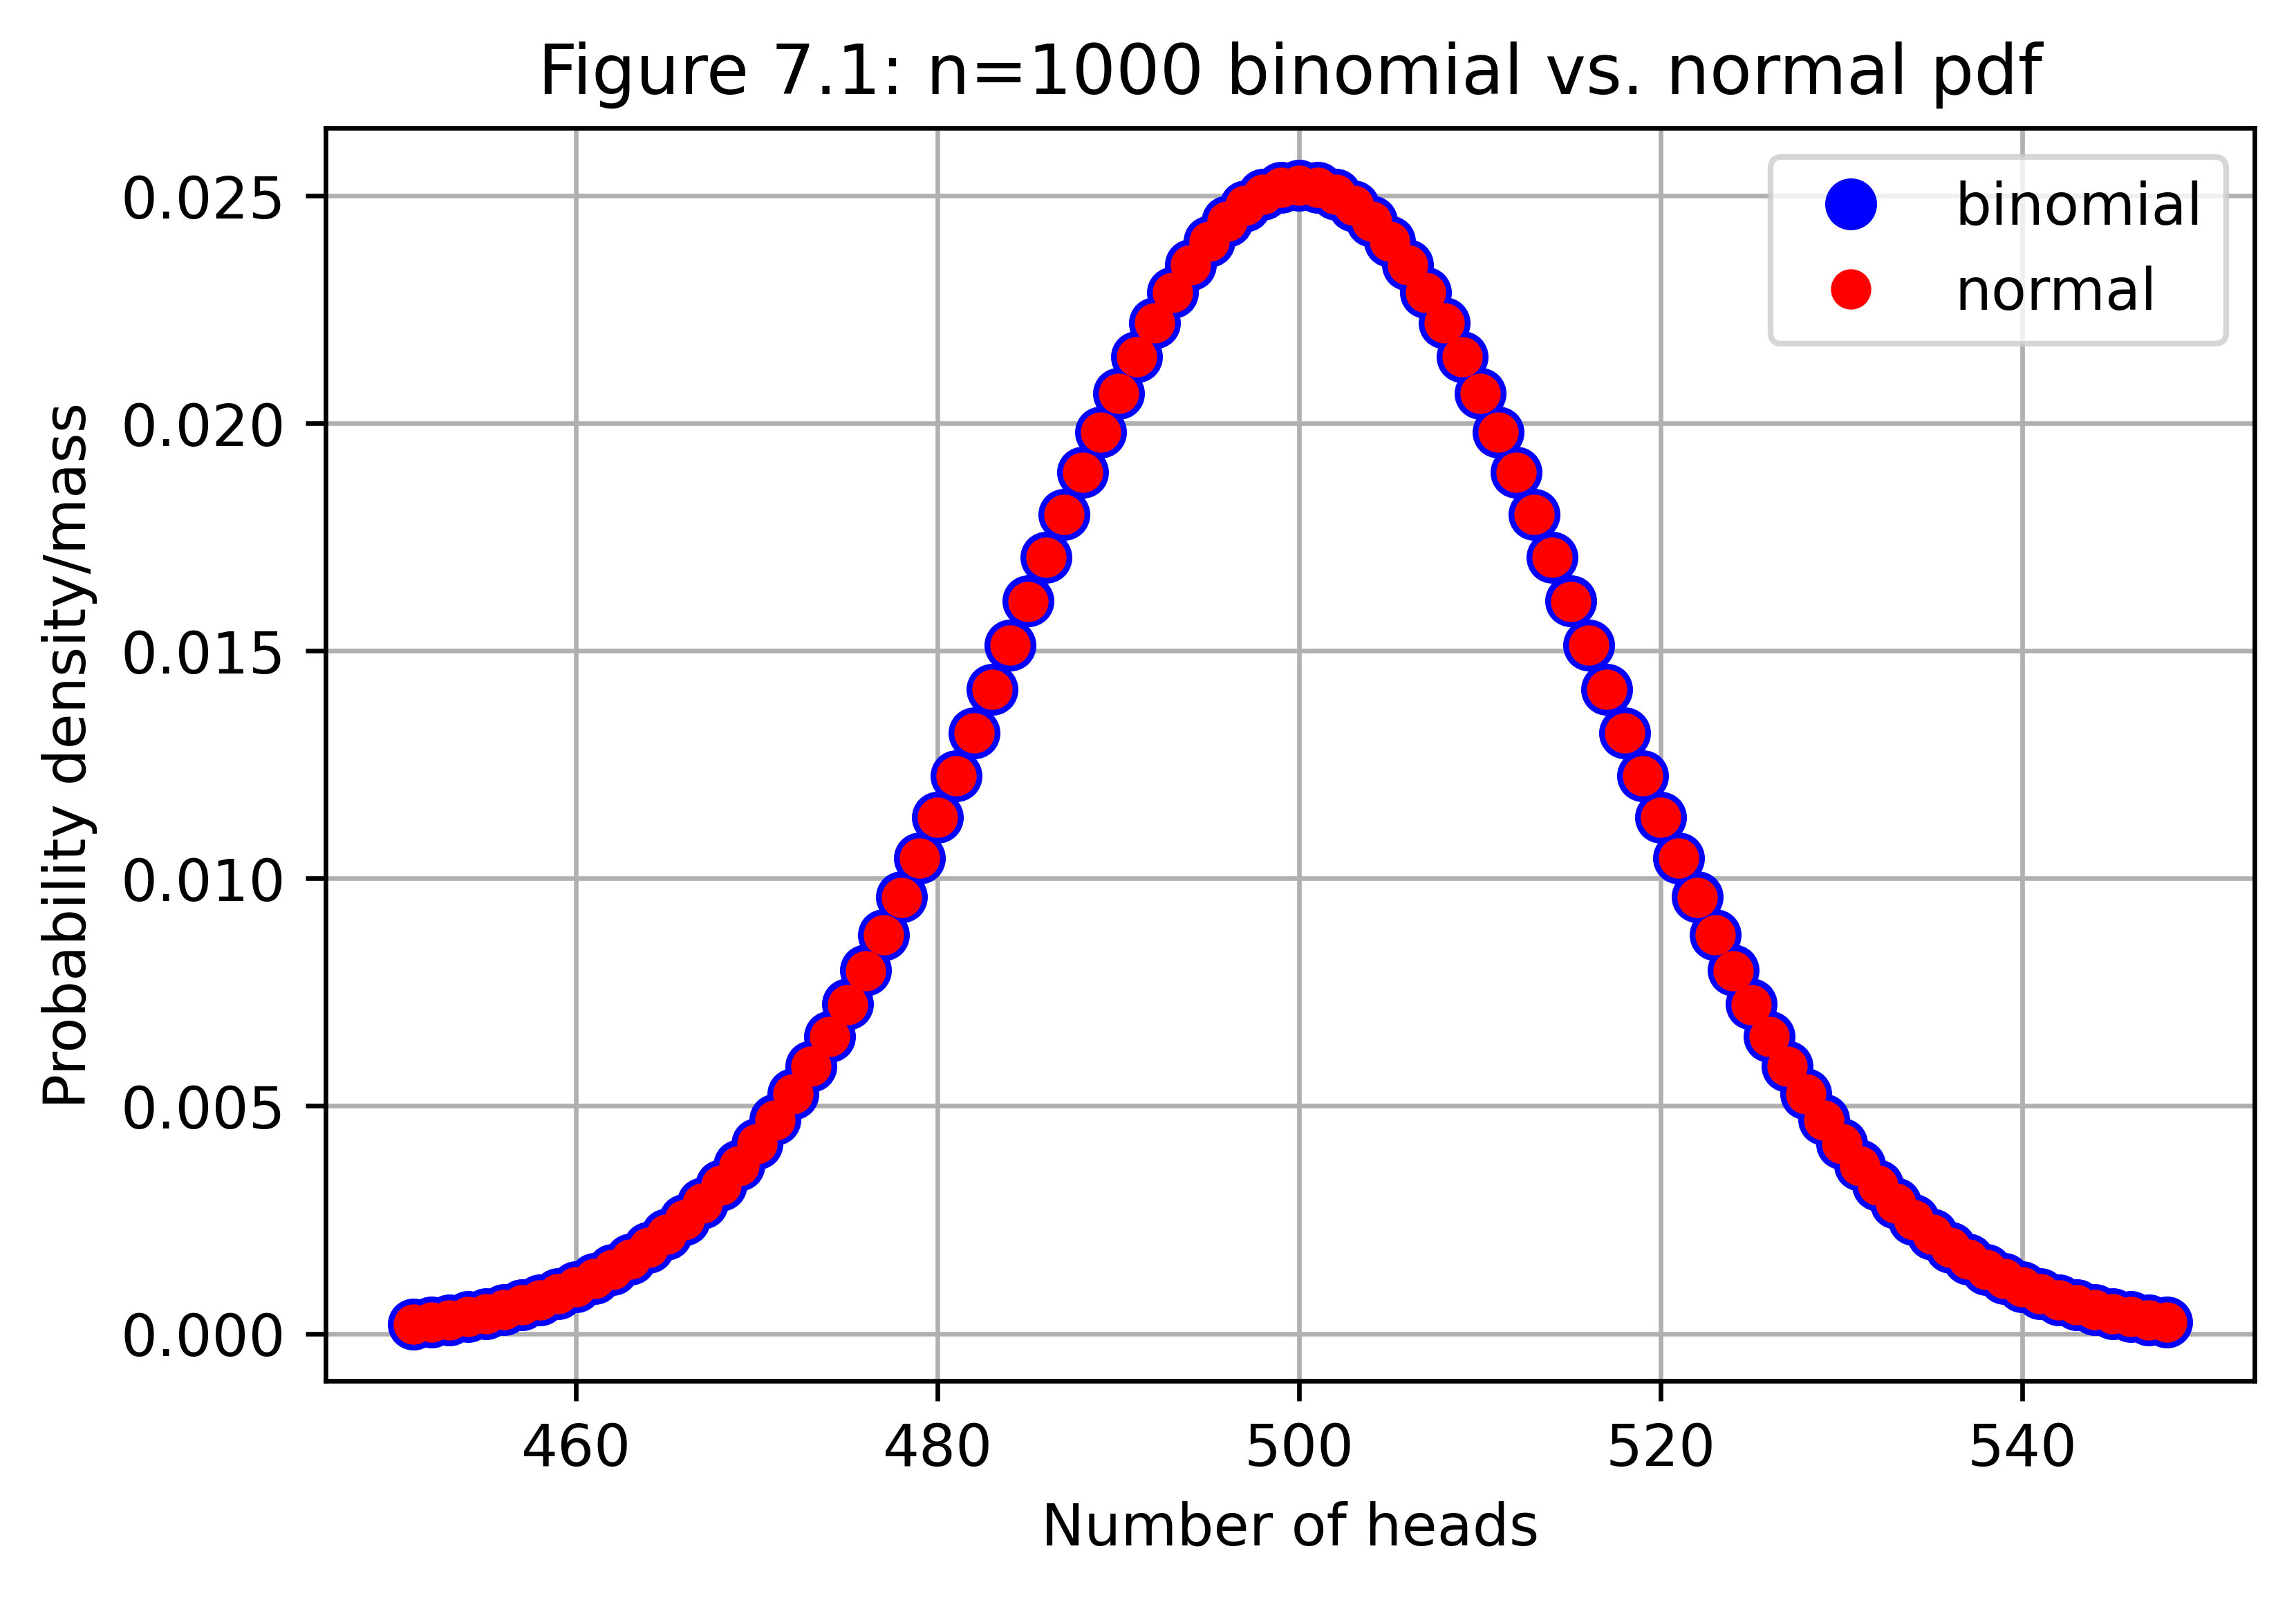

In [2]:
#Code Segment 7.1
#Compare 1000 coin tosses to a normal distribution
import scipy.stats as spst
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']= 300

n, p = 1000, 0.5
mean, var, skew, kurt = spst.binom.stats(n, p, moments='mvsk')
x = np.arange(spst.binom.ppf(0.001, n, p),
               spst.binom.ppf(0.999, n, p))
plt.plot(x, spst.binom.pmf(x, n, p), 'bo', ms=8, label='binomial')
plt.plot(x, spst.norm.pdf(x, loc=mean, scale=np.sqrt(var)), 'ro', label='normal')
plt.title('Figure 7.1: n=1000 binomial vs. normal pdf')
plt.xlabel('Number of heads')
plt.ylabel('Probability density/mass')
plt.legend(loc='best')
plt.grid(True)
plt.show();

## Code segment 7.2  
Figure 7.2 in Section 7.1.1

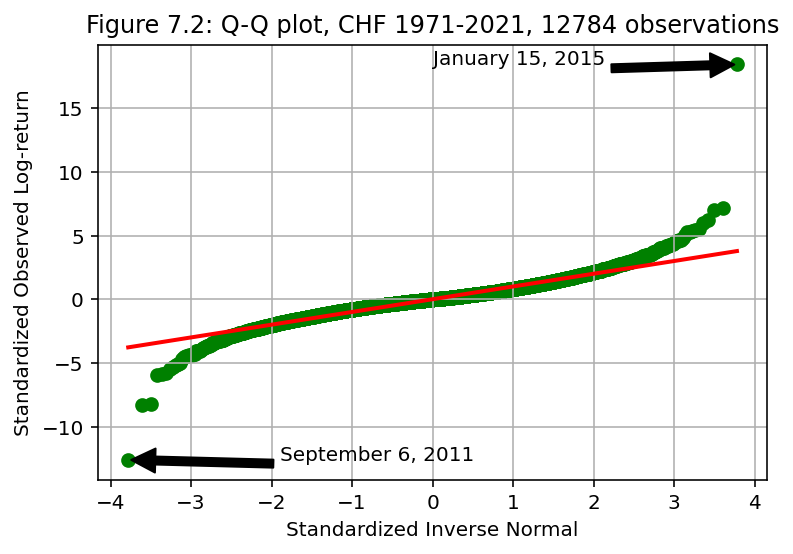

In [3]:
#Code Segment 7.2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import qrpm_funcs as qf
#Get 3 currencies until the end of previous year.

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)
multipliers=[-1,1,-1]
lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)      
        
#Make the Q-Q plot of Swiss francs
chf=[row[0] for row in difflgs]
mean_chf=np.mean(chf)
stdev_chf=np.std(chf)
nobs_chf=len(chf)

#Plot the diagonal
x=spst.norm.ppf([i/(nobs_chf+1) for i in range(1,nobs_chf+1)])
line=plt.plot(x, x)
plt.setp(line, linewidth=2, color='r')

#Plot the actuals
y=np.sort(np.array((chf-mean_chf)/stdev_chf))
plt.scatter(x, y, s=40, c='g')

#Find positive outlier
bigplus=max(y)
plt.annotate('January 15, 2015', xy=(max(x), bigplus), xytext=(0, bigplus),
            arrowprops=dict(facecolor='black', shrink=0.02),)

#Find negative outlier
bigminus=min(y)
plt.annotate('September 6, 2011', xy=(min(x), bigminus), xytext=(.5*min(x), bigminus),
            arrowprops=dict(facecolor='black', shrink=0.02),)

# Configure the graph
plt.title('Figure 7.2: Q-Q plot, CHF '+lgdates[0][:4]+'-'+lastday[:4]+ \
          ', '+str(nobs_chf)+' observations')
plt.xlabel('Standardized Inverse Normal')
plt.ylabel('Standardized Observed Log-return')
plt.grid(True)
plt.show;

## Code segment 7.3  
Figure 7.3 in Section 7.1.1

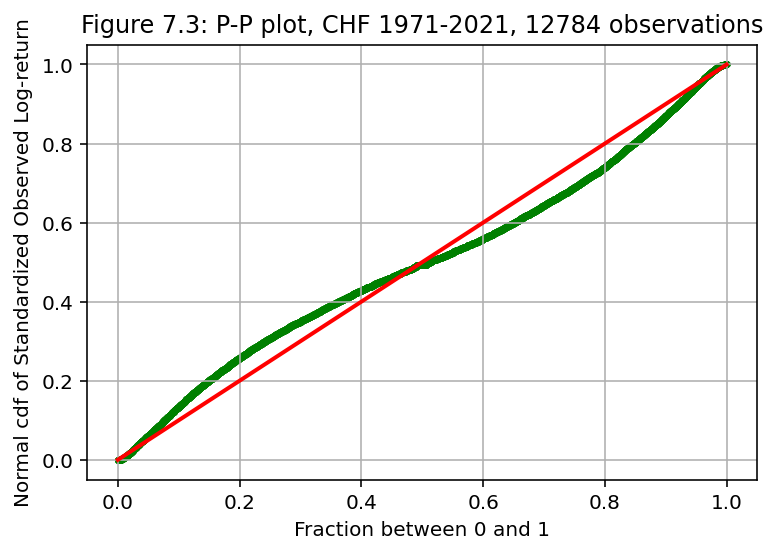

In [4]:
#Code Segment 7.3
#Make the P-P plot of Swiss francs
x=[i/(nobs_chf+1) for i in range(1,nobs_chf+1)]
#Plot the diagonal
line=plt.plot(x, x)
plt.setp(line, linewidth=2, color='r')
#Plot the actuals
y=np.sort(np.array(spst.norm.cdf((chf-mean_chf)/stdev_chf)))
plt.scatter(x, y, s=5, c='g')
## Configure the graph
plt.title('Figure 7.3: P-P plot, CHF '+lgdates[0][:4]+'-'+lastday[:4]+ \
          ', '+str(nobs_chf)+' observations')
plt.xlabel('Fraction between 0 and 1')
plt.ylabel('Normal cdf of Standardized Observed Log-return')
plt.grid(True)
plt.show;

## Code segment 7.4  
Jarque-Bera calculations in Section 7.1.2

In [5]:
#Code Segment 7.4
#Jarque-Bera
sk=spst.skew(chf)
ku=spst.kurtosis(chf)    #This gives excess kurtosis
jb=(nobs_chf/6)*(sk**2+(ku**2)/4)
chi2=spst.chi2.cdf(jb,2)
print('Skewness %f' % sk)
print('Excess Kurtosis %f' % ku)
print('Jarque-Bera Statistic %f' % jb)
print('Chi-squared probability non-normal %f' % chi2)

Skewness 0.396194
Excess Kurtosis 14.499288
Jarque-Bera Statistic 112316.617856
Chi-squared probability non-normal 1.000000


## Code segment 7.5  
Table 7.1 in Section 7.1.3

In [6]:
#Code Segment 7.5
#Normal distribution probabilities
from tabulate import tabulate

out_table = [['%3.0f' % i,'%15.9f' % np.log10(spst.norm.cdf(-i))] for i in range(21)]
headers=['Std. Devs','log10(prob)']

print('Table 7.1: Normal distribution probabilities (log10)')
print(tabulate(out_table, headers, tablefmt='fancy_grid'))

Table 7.1: Normal distribution probabilities (log10)
╒═════════════╤═══════════════╕
│   Std. Devs │   log10(prob) │
╞═════════════╪═══════════════╡
│           0 │     -0.30103  │
├─────────────┼───────────────┤
│           1 │     -0.799546 │
├─────────────┼───────────────┤
│           2 │     -1.64302  │
├─────────────┼───────────────┤
│           3 │     -2.8697   │
├─────────────┼───────────────┤
│           4 │     -4.49933  │
├─────────────┼───────────────┤
│           5 │     -6.54265  │
├─────────────┼───────────────┤
│           6 │     -9.00586  │
├─────────────┼───────────────┤
│           7 │    -11.8929   │
├─────────────┼───────────────┤
│           8 │    -15.2061   │
├─────────────┼───────────────┤
│           9 │    -18.9475   │
├─────────────┼───────────────┤
│          10 │    -23.1181   │
├─────────────┼───────────────┤
│          11 │    -27.7188   │
├─────────────┼───────────────┤
│          12 │    -32.7504   │
├─────────────┼───────────────┤
│          13 │    

## Code segment 7.6  
Figure 7.4 in Section 7.1.4

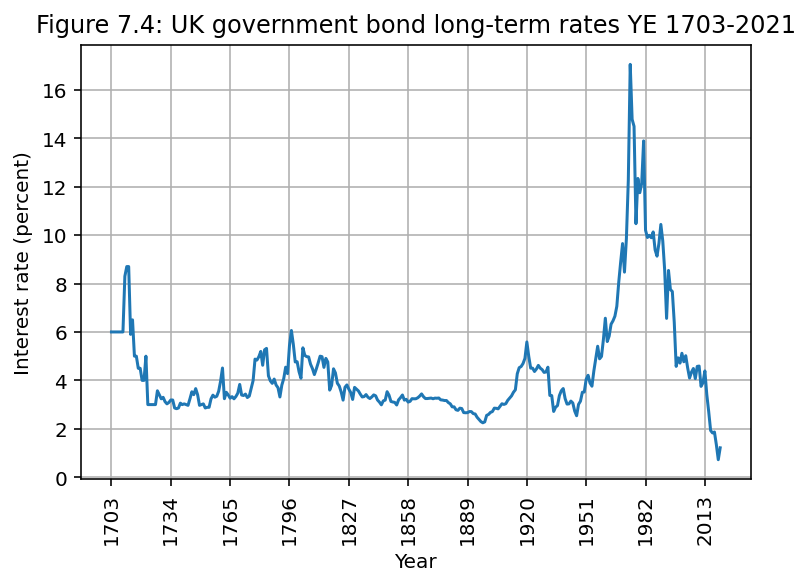

In [7]:
#Code Segment 7.6
#Get long bond/consol rates from 1703 to present
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import Request, urlopen
import numpy as np
import pandas as pd
import datetime as datetime
import qrpm_funcs as qf

lastday=qf.LastYearEnd()

#Get annual and monthly data from Bank of England millenium study
url="https://www.bankofengland.co.uk/-/media/boe/files/statistics/research-datasets"
url+="/a-millennium-of-macroeconomic-data-for-the-uk.xlsx"
sheet1='A31. Interest rates & asset ps '    #Annual data starting 1703
sheet2='M10. Mthly long-term rates'         #Monthly data starting 1753
historical_lt=pd.read_excel(url,engine="openpyxl",sheet_name=[sheet1,sheet2])

#Annual data
dates=[]
rates=[]
for i in range(21,71):
    end_year=str(historical_lt[sheet1].iloc[i][0])+"-12-31"
    dates.append(datetime.datetime.strptime(end_year, "%Y-%m-%d"))
    rates.append(historical_lt[sheet1].iloc[i][19])

#Monthly data
end_days={'Jan': 31, 'Feb': 28, 'Mar': 31, 'Apr': 30, 'May': 31, 'Jun': 30, \
          'Jul': 31, 'Aug': 31, 'Sep': 30, 'Oct': 31, 'Nov': 30, 'Dec': 31}
for i in range(12,len(historical_lt[sheet2])-5):   #Problems at the end of the sheet
    end_month=str(historical_lt[sheet2].iloc[i][0])+'-'+historical_lt[sheet2].iloc[i][1]
    end_month+='-'+str(end_days[historical_lt[sheet2].iloc[i][1]])
    dates.append(datetime.datetime.strptime(end_month, "%Y-%b-%d"))
    rates.append(historical_lt[sheet2].iloc[i][10])
    
#Get recent long-term rates from Bank of England (up to end of last year)
#Using format indicated in
#https://www.bankofengland.co.uk/boeapps/database/help.asp?Back=Y&Highlight=CSV#CSV
#20-year rates splice the best with consol data
url="https://www.bankofengland.co.uk/boeapps/database/_iadb-fromshowcolumns.asp?csv.x=yes"
url+="&Datefrom=01/Jan/2016&Dateto=31/Dec/"+lastday[:4]
url+="&SeriesCodes=IUMLNZC&CSVF=TN&UsingCodes=Y"
myHeaders = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36', \
             'Referer': 'https://www.bankofengland.co.uk', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}
url_request  = Request(url, headers=myHeaders)
data = urlopen(url_request )
recent_lt=pd.read_csv(data)

last_historic = dates[-1]
for i in range(len(recent_lt)):
    this_date = datetime.datetime.strptime(recent_lt["DATE"].iloc[i], "%d %b %Y")
    if this_date>last_historic:
        dates.append(this_date)
        rates.append(recent_lt["IUMLNZC"].iloc[i])
        
df_longterm = pd.DataFrame(data={'Date': dates, 'Rate': rates})

df_long_annual = df_longterm.resample('A', on='Date').last()

years = [df_long_annual.index[i].year for i in range(len(df_long_annual))]

#Display plot

n_years = len(df_long_annual)
stride = int(n_years/10)

plt.plot(range(n_years), df_long_annual["Rate"])
plt.xticks(np.arange(0,n_years,stride),years[::stride],rotation='vertical')
str_title='Figure 7.4: UK government bond long-term rates YE '
str_title+=str(df_long_annual.index[0].year)+'-'
str_title+=str(df_long_annual.index[-1].year)
plt.title(str_title)
plt.xlabel('Year')
plt.ylabel('Interest rate (percent)')
plt.grid(True)
plt.show;

## Code segment 7.7  
Large observations in UK rate changes in Section 7.1.4

In [8]:
#Code Segment 7.7
#Compute lag-1 differences of long-term UK rate levels
df_diffs=df_long_annual.diff().drop(index=df_long_annual.index[0])

#Standardize
diff_mean=df_diffs["Rate"].mean(axis=0)
diff_std=df_diffs["Rate"].std(axis=0)
df_diffs["Rate"]=(df_diffs["Rate"]-diff_mean)/diff_std

#Find large moves
expected_max=-spst.norm.ppf(1./len(df_diffs))
bigger_count=abs(df_diffs["Rate"])>expected_max
print('Normal standard deviations for one in {} years: {}'.format(len(df_diffs),expected_max))
print('Observations larger than that:')
print(df_diffs[bigger_count].sort_values(by=['Rate'])['Rate'])

Normal standard deviations for one in 318 years: 2.732303990659007
Observations larger than that:
Date
1977-12-31   -5.902363
1982-12-31   -5.416020
1713-12-31   -4.104369
1975-12-31   -3.323273
1722-12-31   -2.925356
1993-12-31   -2.910619
1978-12-31    2.778117
1994-12-31    2.940231
1710-12-31    3.411836
1973-12-31    3.573950
1974-12-31    7.081513
Name: Rate, dtype: float64


## Code segment 7.8  
Figures 7.5a and 7.5b in Section 7.2

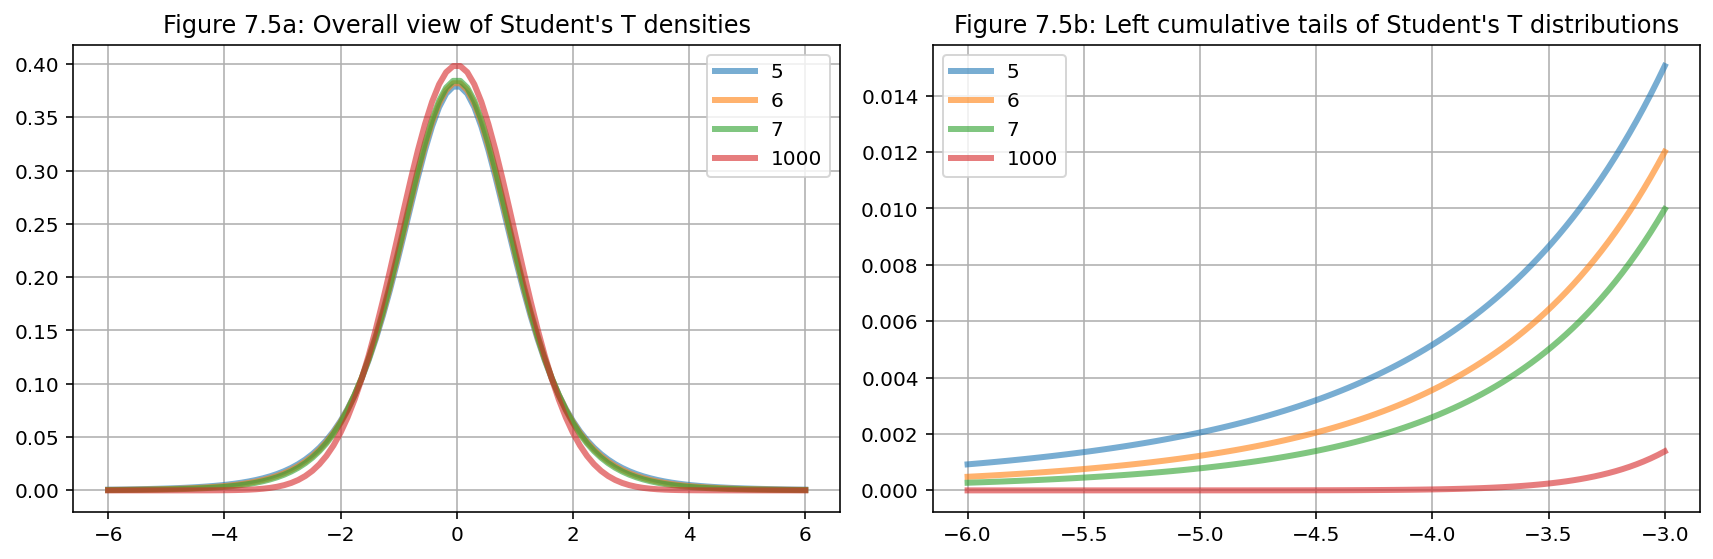

In [9]:
#Code Segment 7.8
from scipy.stats import t
import matplotlib.pyplot as plt

highend=[6.,-3.]
title_strings=["Figure 7.5a: Overall view of Student\'s T densities",
               "Figure 7.5b: Left cumulative tails of Student\'s T distributions"]
plt.figure(figsize=(12,4))
for sp, top in enumerate(highend):
    plt.subplot(1, 2, sp+1)
    x = np.linspace(-6., top, 100)
    for d in (5,6,7,1000):
        if sp==0:
            plt.plot(x, t.pdf(x, d), lw=3, alpha=0.6, label=str(d))
        else:
            plt.plot(x, t.cdf(x, d), lw=3, alpha=0.6, label=str(d))
    plt.grid()
    plt.legend()
    plt.title(title_strings[sp])

plt.tight_layout()
plt.show();

## Code segment 7.9  
Figure 7.6 in Section 7.3

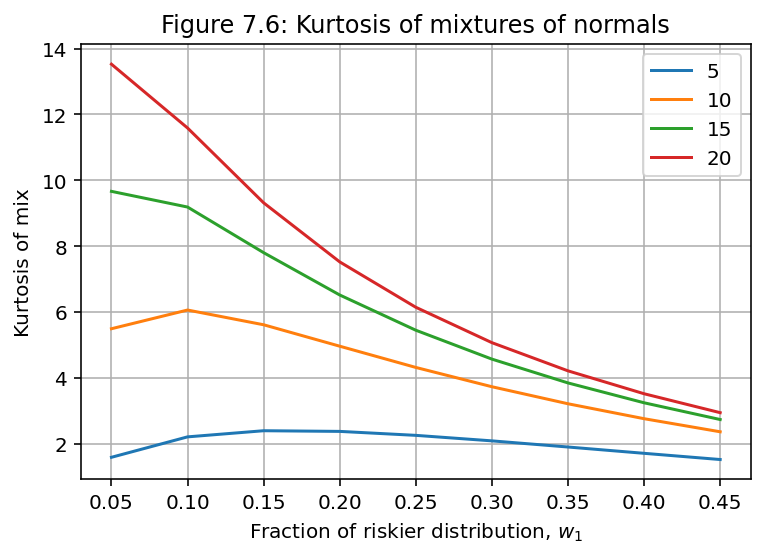

In [10]:
#Code Segment 7.9
#Generate mixed normal kurtosis graph using formula 7.20

#x contains fractions of the riskier distribution going into the mix
x=np.arange(.05,.5,.05)

#y contains the multiple (how much riskier the riskier distribution is than the less risky)  
y=[5,10,15,20]

z=np.zeros((len(y),len(x)))
for i,multiple in enumerate(y):
    for j,mixamount in enumerate(x):
        #numerator 7.20
        z[i,j] = mixamount*multiple**2
        z[i,j] = mixamount*multiple**2+1-mixamount
        #denominator 7.20
        z[i,j] /= (mixamount*multiple+1-mixamount)**2
        #multiply by 3 and subtract 3
        z[i,j] -= 1
        z[i,j] *= 3
    plt.plot(x,z[i,:],label=str(multiple))

plt.grid()
plt.legend()
plt.xlabel('Fraction of riskier distribution, '+r'$w_1$')
plt.ylabel('Kurtosis of mix')
plt.title('Figure 7.6: Kurtosis of mixtures of normals')
plt.show;

## Code segment 7.10  
Figures 7.7a and 7.7b in Section 7.4

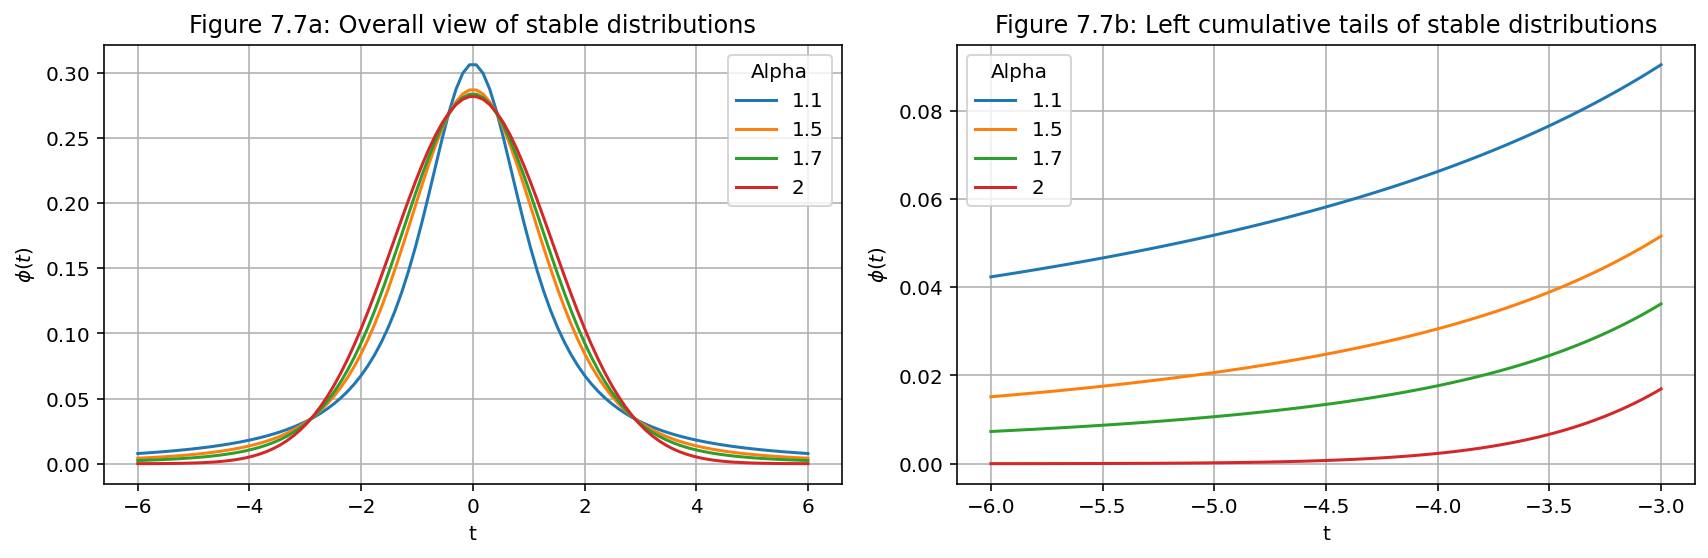

In [11]:
#Code Segment 7.10
highend=[6.,-3.]
beta = 0     #symmetric
title_strings=["Figure 7.7a: Overall view of stable distributions",
               "Figure 7.7b: Left cumulative tails of stable distributions"]
plt.figure(figsize=(12,4))

for sp, top in enumerate(highend):
    plt.subplot(1, 2, sp+1)
    x = np.linspace(-6., top, 100)
    for alpha in [1.1,1.5,1.7,2]:
        if sp==0:
            plt.plot(x, spst.levy_stable.pdf(x, alpha, beta),
                label=str(alpha))
        else:
            plt.plot(x, spst.levy_stable.cdf(x, alpha, beta),
                label=str(alpha))
    plt.grid()
    plt.xlabel("t")
    plt.ylabel("$\phi(t)$")
    plt.legend(title="Alpha")
    plt.title(title_strings[sp])
    
plt.tight_layout()
plt.show();

## Code segment 7.11  
Figure 7.8 in Section 7.4

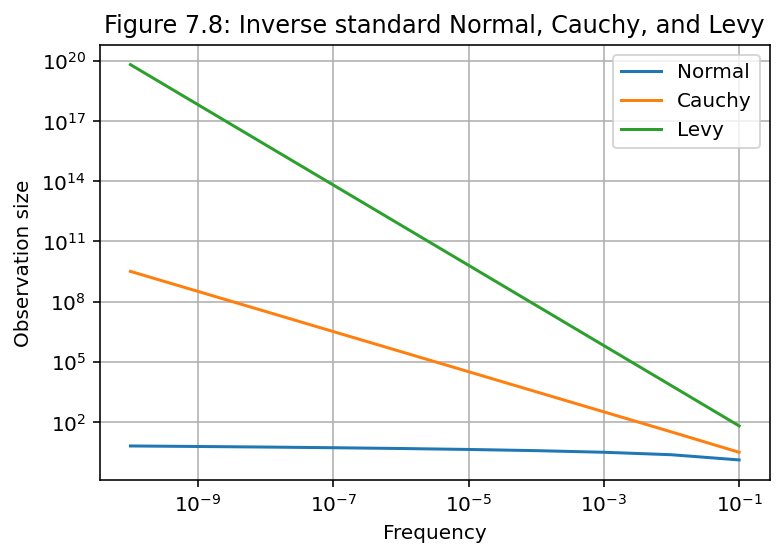

Observation sizes for p=.0001:
Normal: 3.7190164854556804
Cauchy: 3183.0987571168284
Levy: 63661976.90343881


In [12]:
#Code Segment 7.11
#Generate graph comparing standard Cauchy, Levy, and normal densities
p10=np.arange(1,11,1)
x=np.exp(-p10*np.log(10))
ynormal=-spst.norm.ppf(x,0,1)
ycauchy=-spst.cauchy.ppf(x,0,1)
ylevy=spst.levy.ppf(1-x,0,1)

plt.plot(x,ynormal,label='Normal')
plt.plot(x,ycauchy,label='Cauchy')
plt.plot(x,ylevy,label='Levy')

plt.grid()
plt.xscale('log')
plt.xlabel('Frequency')
plt.yscale('log')
plt.ylabel('Observation size')
plt.legend()
plt.title('Figure 7.8: Inverse standard Normal, Cauchy, and Levy')
plt.show();

print('Observation sizes for p=.0001:')
print('Normal:',ynormal[3])
print('Cauchy:',ycauchy[3])
print('Levy:',ylevy[3])

## Code segment 7.12  
Figure 7.9 in Section 7.4

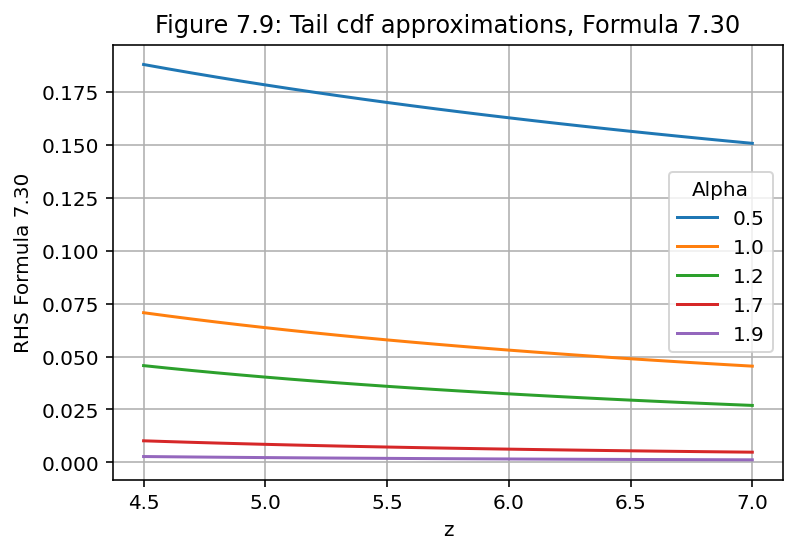

In [13]:
#Code Segment 7.12
import scipy as sp
#Generate tail densities for various alphas
#using formula 7.30
x=np.arange(4.5,7.1,.1)
beta=0.0
gamma=1.0
alpha=[0.5,1.0,1.2,1.7,1.9]

for i,a in enumerate(alpha):
    tailscale=gamma**a
    tailscale*=np.sin(np.pi*a/2)
    tailscale*=sp.special.gamma(a)/np.pi
    tailscale*=(1+beta)
    row=[tailscale*x**(-a)]
    plt.plot(x,np.array(row[0]),label=str(a))

plt.grid()
plt.xlabel("z")
plt.ylabel("RHS Formula 7.30")
plt.legend(title="Alpha")
plt.title("Figure 7.9: Tail cdf approximations, Formula 7.30")
plt.show;

## Code segment 7.13  
Figure 7.10 in Section 7.5

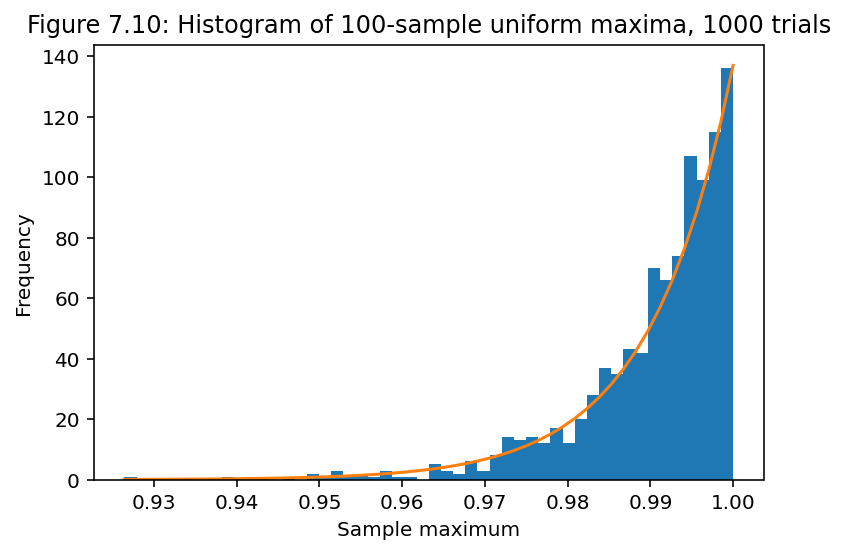

In [14]:
#Code Segment 7.13
#Generate maxima of uniform samples
maxima=[]
n_sample, n_trials=100, 1000

rng = np.random.default_rng(111)   #Use seed so repeatable
maxima=np.amax(np.split(rng.uniform(size=n_sample*n_trials),n_trials),axis=1)

#generate histogram
n_per_bin, bins, patches = plt.hist(maxima, 50)

#generate theoretical density function; scale so area under curve = n_trials
y=bins**(n_sample-1)
y*=n_trials/sum(y)
    
plt.plot(bins, y)
plt.title("Figure 7.10: Histogram of "+str(n_sample)+"-sample uniform maxima, " \
          +str(n_trials)+" trials")
plt.xlabel("Sample maximum")
plt.ylabel("Frequency")
plt.show();

## Code segment 7.14  
Figure 7.11 in Section 7.5

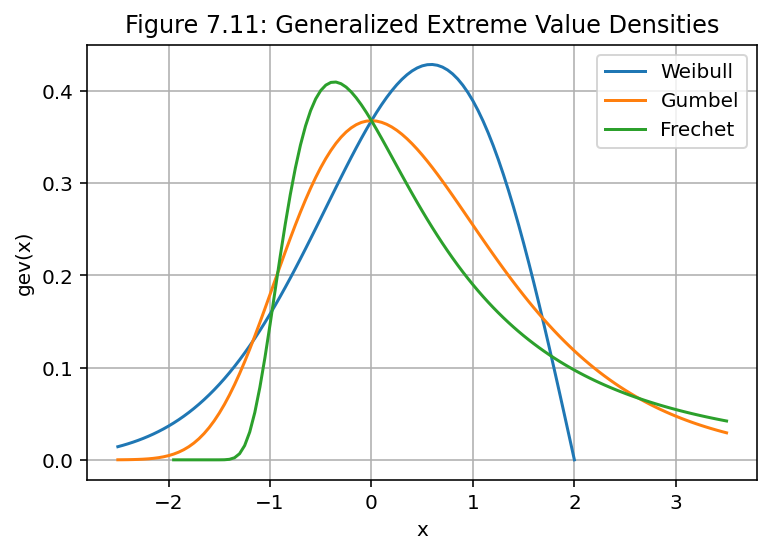

In [15]:
#Code Segment 7.14
#Generate Weibull, Gumbel and Frechet densities
#using 7.34 and 7.35

def gev(gamma,x):
    #Return pdf of a gev with parameter gamma at point x
    if gamma != 0:
        op_gamma_x = 1 + gamma*x
        if op_gamma_x > 0:    #make sure in the support
            oo_gamma_power=op_gamma_x**(-1/gamma)
            gev_cdf=np.exp(-oo_gamma_power)
            gev_pdf=oo_gamma_power*gev_cdf/op_gamma_x
        else:
            gev_pdf = np.nan
    else:   #gumbel
        gev_cdf = np.exp(-np.exp(-x))
        gev_pdf = np.exp(-x)*gev_cdf
    return(gev_pdf)

gamma_list=[-0.5,0.0,.5]
name_list=['Weibull','Gumbel','Frechet']
x_list=np.arange(-2.5,3.55,.05)

for i,gamma in enumerate(gamma_list):
    y=[gev(gamma,x) for x in x_list]
    plt.plot(x_list,y,label=name_list[i])

plt.grid()
plt.xlabel("x")
plt.ylabel("gev(x)")
plt.legend()
plt.title('Figure 7.11: Generalized Extreme Value Densities')
plt.show();

## Code segment 7.15  
Figure 7.12 in Section 7.5.1

Worst observation: 0.0889068913314174
Best block: -0.0006642311768628944


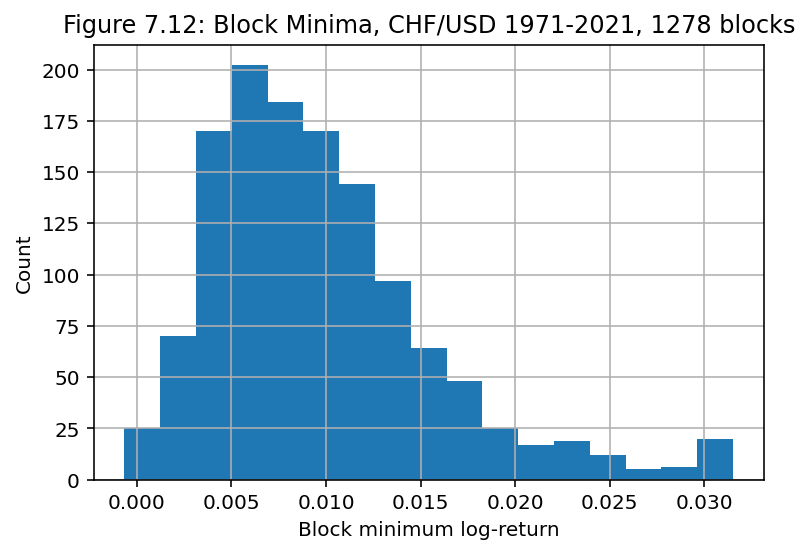

In [16]:
#Code Segment 7.15
#Get block maxima (actually minima since looking for big losses) by
#grouping into 10-day blocks; using Swiss francs chf
blocksize=10; iblox=int(len(chf)/blocksize)
worstguys=-np.amin(np.split(np.array(chf[:iblox*blocksize]),iblox),axis=1)
    
#Plot a histogram of block maxima. histogram is
#Long-tailed to the right so have a "more" category
num_bins=int(np.sqrt(len(worstguys))/2)
#Winsorize so long tail doesn't give unrealistic scale of histogram.
#Winsorized values will show up in the highest bin of the histogram.
prettybad=np.percentile(worstguys,99)
sortaworst=[min(x,prettybad) for x in worstguys]

n, bins, patches = plt.hist(sortaworst, num_bins)
plt.title('Figure 7.12: Block Minima, CHF/USD 1971-' \
          +lastday[:4]+', '+str(len(worstguys))+' blocks')
plt.ylabel('Count')
plt.xlabel('Block minimum log-return')
plt.grid()
plt.show;
print('Worst observation:',np.max(worstguys))
print('Best block:',np.min(worstguys))

## Code segment 7.16  
Figure 7.13 in Section 7.5.1

Gamma= 0.1010694768360614
Mu= 0.00692267514422739
Sigma= 0.004302550116011067


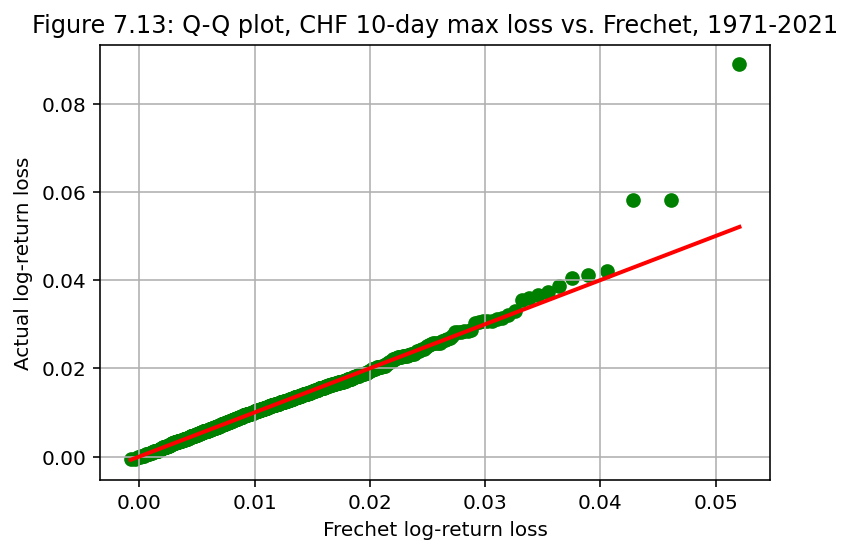

In [17]:
#Code Segment 7.16
#Find the best fit extreme value distribuion to CHF block maxima

xsample=np.sort(worstguys)
m_sample=len(xsample)
ysample=[(i+1)/(m_sample+1) for i in range(m_sample)]

#Use scipy.stats.genextreme to fit - "c" parameter is minus gamma in our notation
fit_params = spst.genextreme.fit(xsample)
dist_name=['Frechet','Gumbel','Weibull'][int(np.sign(fit_params[0]))+1]

gma=-fit_params[0]; mu=fit_params[1]; sigma=fit_params[2]    
    
print("Gamma=",gma)    
print("Mu=",mu)
print("Sigma=",sigma)

#Make the Q-Q plot of extremes versus the best fit distribution
#Inverse cumulative distribution of a probability p is:
#sigma*{((-ln(p))^(-gma)-1)/gma}+mu
#Equally spaced p's are in ysample. Don't have to worry about gma=0 due to sampling noise
xgenex=(-np.log(ysample))**(-gma)-1
xgenex*=sigma/gma
xgenex+=mu
#Plot the diagonal
line=plt.plot(xgenex,xgenex)
plt.setp(line, linewidth=2, color='r')
#Plot the actuals
plt.scatter(xgenex,xsample, s=40, c='g')
tstr='Figure 7.13: Q-Q plot, CHF %d-day max loss vs. ' % blocksize
tstr+=dist_name+', '+lgdates[0][:4]+'-'+lastday[:4]
plt.title(tstr)
plt.xlabel(dist_name+' log-return loss')
plt.ylabel('Actual log-return loss')
plt.grid(True)
plt.show;

## Code segment 7.17  
Figure 7.14 in Section 7.6

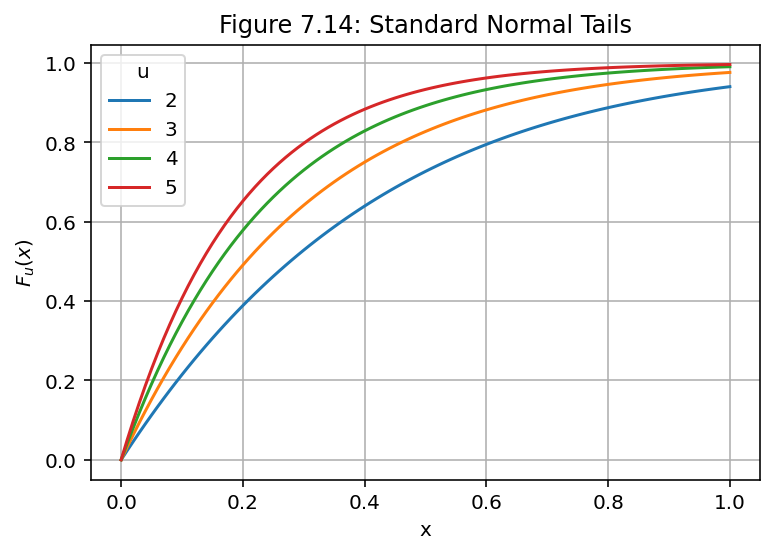

In [18]:
#Code Segment 7.17
#Generate normal tails according to 7.44
xlist=np.arange(0,1.01,.01)
ulist=[2,3,4,5]

for u in ulist:
    fofu=spst.norm.cdf(u)
    y=[(spst.norm.cdf(x+u)-fofu)/(1-fofu) for x in xlist]
    plt.plot(xlist,y,label=str(u))

plt.grid()
plt.xlabel("x")
plt.ylabel("$F_u(x)$")
plt.legend(title="u")
plt.title('Figure 7.14: Standard Normal Tails')
plt.show();

## Code segment 7.18  
Figure 7.15 in Section 7.6.1

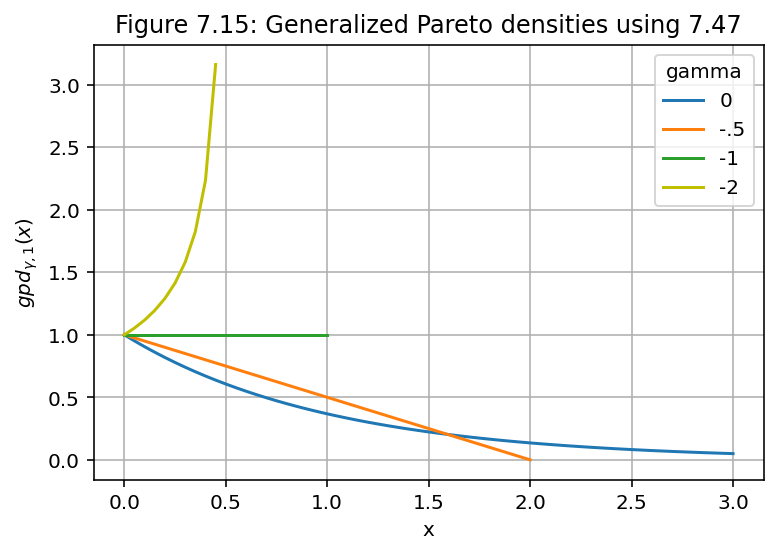

In [19]:
#Code Segment 7.18
#Create Generalized Pareto densities using 7.47
xlist=np.arange(0,3.05,.05)

#gamma=0; density is exp(-x)
plt.plot(xlist,[np.exp(-x) for x in xlist],label='0')

#gamma=-.5; upper limit is 2
shortlist=np.arange(0,2.05,.05)
y=[1-x/2 for x in shortlist]
y+=[np.nan]*(len(xlist)-len(shortlist))
plt.plot(xlist,y,label='-.5')

#gamma=-1; constant value of 1 up to 1
shortlist=np.arange(0,1.05,.05)
y=[1]*len(shortlist)
y+=[np.nan]*(len(xlist)-len(shortlist))
plt.plot(xlist,y,label='-1')

#gamma=-2; blows up at x=.5
#1/sqrt(1-2x)
shortlist=np.arange(0,.5,.05)
y=[1/(1-2*x)**.5 for x in shortlist]
y+=[np.nan]*(len(xlist)-len(shortlist))
plt.plot(xlist,y,label='-2',color='y')

plt.grid()
plt.xlabel("x")
plt.ylabel("$gpd_{\gamma,1}(x)$")
plt.legend(title="gamma")
plt.title('Figure 7.15: Generalized Pareto densities using 7.47')
plt.show();

## Code segment 7.19  
Exceedance calculations in Section 7.6.1

In [20]:
#Code Segment 7.19
#Generate 10,000 standard normal draws
#Take exceedances over threshold; show number and average exceedance
threshold=2
n_sample=10000

rng = np.random.default_rng(314159)   #Use seed so repeatable
sample = rng.normal(size=n_sample)

exceeds=[s-threshold for s in sample if s>threshold]  #Exceedance set over u=threshold

numex=len(exceeds)    #exceedance count
#Theoretical exceedance count
theo_numex=int(n_sample*spst.norm.cdf(-threshold)+.5)

avex=np.mean(exceeds) #y-bar
#Theoretical average exceedance
theo_avex=np.exp(-threshold)/((1-spst.norm.cdf(threshold))*np.sqrt(2*np.pi))-threshold

#Sample maximum likelihood function 7.48
maxlike=-numex*(np.log(avex)+1)
#Theoretical maximum likelihood function
theo_maxlike=-theo_numex*(np.log(theo_avex)+1)

print('Sample number of exceedances over {0}: {1}'.format(threshold,numex))
print('Theoretical number of exceedances: {0}'.format(theo_numex))
print('\nSample average exceedance:',avex)
print('Theoretical average exceedance:',theo_avex)
print('\nSample maximum likelihood function at beta: {0}'.format(maxlike))
print('Theoretical maximum likelihood function at beta: {0}'.format(theo_maxlike))

Sample number of exceedances over 2: 236
Theoretical number of exceedances: 228

Sample average exceedance: 0.35425370003744094
Theoretical average exceedance: 0.37321553282284103

Sample maximum likelihood function at beta: 8.907101559107904
Theoretical maximum likelihood function at beta: -3.2833846264013493


## Code segment 7.20  
LML optimization in Section 7.6.1

In [21]:
#Code Segment 7.20
import scipy.optimize as scpo

#Log-max-likelihood for GPD. Sign is reversed since we are using minimize.
def gpd_lml(params):
    gma,beta_log=params
    #enforce positive beta
    beta=np.exp(beta_log)
    #check if gamma=0
    tolerance=10**(-9)
    if abs(gma)<tolerance:
        return(numex*(beta_log+avex/beta))
    #uses "exceeds" vector computed above
    log_sum=0
    #sum ln(1+gamma*yi/beta) when positive
    for i in range(numex):
        arg_log=1+gma*exceeds[i]/beta
        if arg_log<=0:
            log_sum+=1000*np.sign(1+1/gma)  #put a very discouraging amount in the sum
        else:
            log_sum+=np.log(arg_log)
    #scale
    log_sum*=(1+1/gma)
    if beta<=0:
        log_sum+=1000
    else:
        log_sum+=numex*np.log(beta)
    return(log_sum)

#initial guess for parameters is gumbel
init_params=[0.,np.log(avex)]
#Run the minimization.
results = scpo.minimize(gpd_lml,
                            init_params,
                            method='CG')
gma_res,beta_res=results.x
beta_res=np.exp(beta_res)   #move back from log space

print("Optimal gamma:",gma_res)
print("Optimal beta:",beta_res)
print("Support cap mF:",-beta_res/gma_res)
print("Optimal LML:",-results.fun)

Optimal gamma: -0.1222964728798896
Optimal beta: 0.3972327555202584
Support cap mF: 3.248112935443286
Optimal LML: 10.744930456472702


## Code segment 7.21  
Figure 7.16 in Section 7.6.1

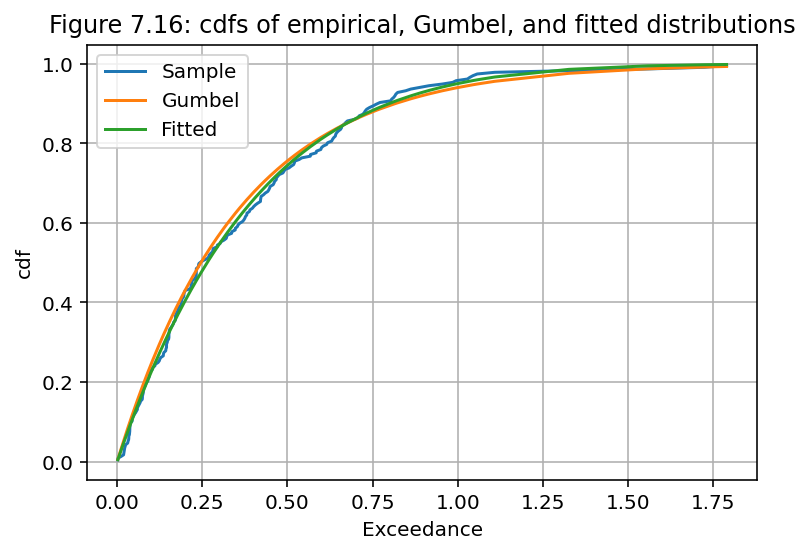

In [22]:
#Code Segment 7.21
#Show the cdf plot
#x's are sorted values of the exceedances
xsample=np.sort(exceeds)
ysample=[(i+1)/(numex+1) for i in range(numex)]
ygumbel=[1-np.exp(-x/avex) for x in xsample]
yfitted=[1-(1+gma_res*x/beta_res)**(-1/gma_res) for x in xsample]

plt.plot(xsample,ysample,label='Sample')
plt.plot(xsample,ygumbel,label='Gumbel')
plt.plot(xsample,yfitted,label='Fitted')

plt.grid()
plt.xlabel("Exceedance")
plt.ylabel("cdf")
plt.legend()
plt.title('Figure 7.16: cdfs of empirical, Gumbel, and fitted distributions')
plt.show;

## Code segment 7.22  
Scipy.stats.genpareto fit in Section 7.6.1

In [23]:
#Code Segment 7.22
#Find the best fit generalized pareto distribuion to normal extrema

xsample=np.sort(exceeds)
m_sample=len(xsample)
ysample=[(i+1)/(m_sample+1) for i in range(m_sample)]

#Use scipy.stats.genpareto to fit
#The fit also finds a location parameter mu
gma_spst, mu_spst, beta_spst = spst.genpareto.fit(xsample,gma_res)

print("scipy.stats optimal gamma, (7.48) gamma:",gma_spst,gma_res)
print("scipy.stats optima mu, (7.48) mu:",mu_spst,0.)
print("scipy.stats optimal beta, (7.48) beta:",beta_spst,beta_res)

scipy.stats optimal gamma, (7.48) gamma: -0.11828512367598179 -0.1222964728798896
scipy.stats optima mu, (7.48) mu: 0.0018525166876476764 0.0
scipy.stats optimal beta, (7.48) beta: 0.393752301002408 0.3972327555202584
